<a href="https://colab.research.google.com/github/snehasharma76/UCB/blob/main/UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Import Dataset

In [ ]:
dataset = pd.read_csv('data.csv')

##Implementing UCB

In [ ]:
import math
N = 50000
d = 8
retailers = []
retailer_selected = [0]*d
sum_of_rewards = [0]*d
total_reward = 0
for n in range(0, N):
  retailer = 0
  max_upper_bound = 0
  for i in range(0, d):
    if(retailer_selected[i]>0):
      average_reward = sum_of_rewards[i] / retailer_selected[i]
      delta_i = math.sqrt(3/2*math.log(n+1)/retailer_selected[i])
      upper_bound = average_reward + delta_i
    else:
        upper_bound = 1e400
    if(upper_bound > max_upper_bound):
          max_upper_bound = upper_bound
          retailer = i
  retailers.append(retailer)
  retailer_selected[retailer] = retailer_selected[retailer] + 1
  reward = dataset.values[n , retailer]
  sum_of_rewards[retailer] =  sum_of_rewards[retailer]+ reward
  total_reward = total_reward + reward

In [ ]:
print(retailer_selected)

[4, 3, 178, 3, 33370, 2, 16302, 138]


##Visualising the results

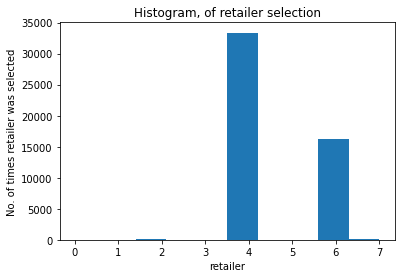

In [ ]:
plt.hist(retailers)
plt.xlabel('retailer')
plt.ylabel('No. of times retailer was selected')
plt.title('Histogram, of retailer selection')
plt.show()